# Exercise: Layer Types and Neural Network Architectures (Deep Neural Networks)


`#pytorch` `#mnist` `#droupout` `#convolution` `#cnn` `#kernels` `#pooling` `#activation` `#classification` `#normalization`

> Objectives:
>
> - Expand knowledge of network layers:
>   - Dropout Layers
>   - Convolutional Layers
>   - Pooling Layers
> - Learn about normalization
> - Experiment with, and integrate layers into the design  model to increase its accuracy.



## Imports


In [1]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torchinfo import summary

/Users/prasunjit/deep-learning/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Data loader


In [2]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
train_batch_size = 64
test_batch_size = 64

transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,)),
    ]
)
trainset = datasets.MNIST(
    "./downloads/mnist",
    download=True,
    train=True,
    transform=transform,
)
testset = datasets.MNIST(
    "./downloads/mnist",
    download=True,
    train=False,
    transform=transform,
)

trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=train_batch_size, shuffle=True
)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=test_batch_size, shuffle=True
)

# Print the total number of images in each dataset
print(f"Total training images: {len(trainset)}")
print(f"Total test images: {len(testset)}")

# Print the number of batches using the DataLoader's length
print(f"Number of training batches: {len(trainloader)}")
print(f"Number of test batches: {len(testloader)}")

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9912422/9912422 [00:03<00:00, 2479811.65it/s]


Extracting ./downloads/mnist/MNIST/raw/train-images-idx3-ubyte.gz to ./downloads/mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28881/28881 [00:00<00:00, 1146390.96it/s]


Extracting ./downloads/mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ./downloads/mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1648877/1648877 [00:00<00:00, 7482722.60it/s]


Extracting ./downloads/mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ./downloads/mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4542/4542 [00:00<00:00, 6197309.29it/s]

Extracting ./downloads/mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./downloads/mnist/MNIST/raw

Total training images: 60000
Total test images: 10000
Number of training batches: 938
Number of test batches: 157


In [4]:
# Set the device to run on: GPU, MPS, or CPU
device = torch.device(
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using mps device


## load our previous model, so that we can compare changes in accuracy.


In [9]:
model_v1 = torch.load("downloads/mnist.pth")
model_v1 = model_v1.to(device)

## Test the model's accuracy on the test data:


In [10]:
model_v1.eval()

correct = 0

with torch.no_grad():
    for i, (images, labels) in enumerate(testloader):
        images = images.view(images.shape[0], -1).to(device)
        outputs = model_v1(images)
        _, predicted = torch.max(outputs, 1)
        # compute the accuracy of the model
        correct += (predicted == labels.to(device)).sum().item() / labels.shape[0]

print(
    f"Accuracy of model_v1 on test data: {100 * correct / len(testloader)}%"
)

Accuracy of model_v1 on test data: 97.00437898089172%


## Experimentation


Layer (type:depth-idx)                   Output Shape              Param #
MNISTClassifier                          [64, 10]                  --
├─Conv2d: 1-1                            [64, 10, 28, 28]          260
├─Conv2d: 1-2                            [64, 20, 14, 14]          5,020
├─Linear: 1-3                            [64, 128]                 125,568
├─Dropout: 1-4                           [64, 128]                 --
├─Linear: 1-5                            [64, 10]                  1,290
Total params: 132,138
Trainable params: 132,138
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 84.14
Input size (MB): 0.20
Forward/backward pass size (MB): 6.09
Params size (MB): 0.53
Estimated Total Size (MB): 6.82
Epoch: 1,	Training loss: 0.2776359150211996


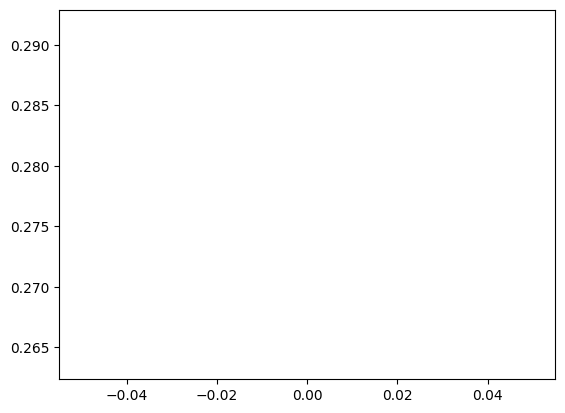

Epoch: 2,	Training loss: 0.09315646811724027


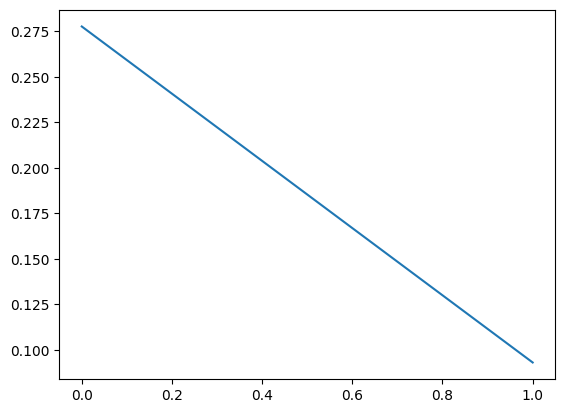

Epoch: 3,	Training loss: 0.06937428670841009


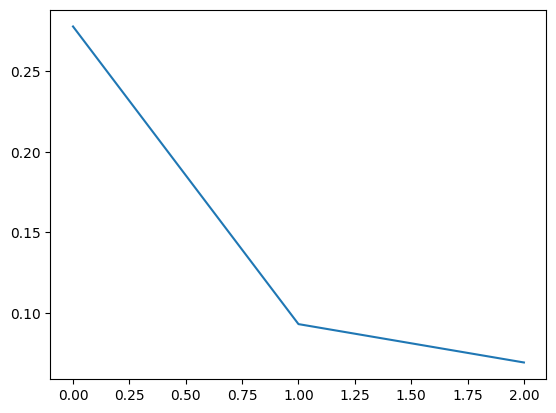

Epoch: 4,	Training loss: 0.05816446690334142


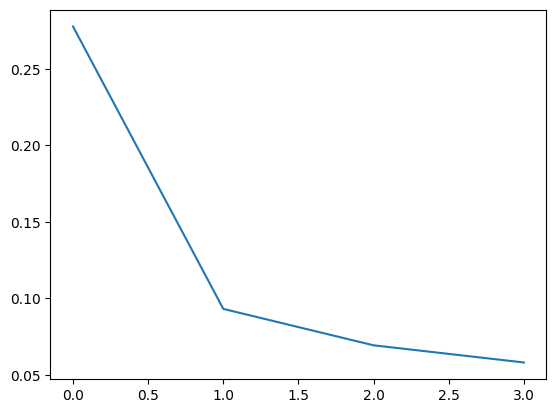

Epoch: 5,	Training loss: 0.049200231786695685


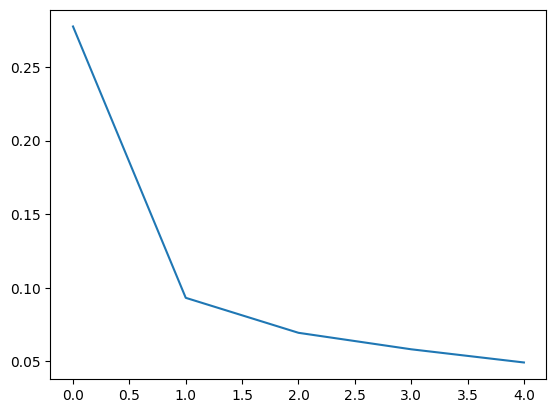

Accuracy of model_v2 on test data: 98.91520700636943%


In [5]:
class MNISTClassifier(nn.Module):
    def __init__(self):
        super(MNISTClassifier, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5, padding=2)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5, padding=2)
        self.fc1 = nn.Linear(980, 128)
        self.fc2 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(0.5)
        # FILL THIS IN...

    def forward(self, x):
        x = self.conv1(x)
        x = nn.functional.relu(x)
        x = nn.functional.max_pool2d(x, 2)
        x = self.conv2(x)
        x = nn.functional.relu(x)
        x = nn.functional.max_pool2d(x, 2)
        x = x.view(x.size(0), -1)  # Flatten the tensor
        x = self.fc1(x)
        x = nn.functional.relu(x)
        x = self.dropout(x)  # Apply dropout
        x = self.fc2(x)
        return x


model_v2 = MNISTClassifier()
print(summary(model_v2, input_size=(64, 1, 28, 28)))
model_v2.to(device)

# Define the loss function
# (Make sure to remove any softmax layers if you choose CrossEntropyLoss)
loss_fn = nn.CrossEntropyLoss()

# Define the optimizer
optimizer = optim.Adam(model_v2.parameters(), lr=0.001)

# Train the model
losses = []
epochs = 5


# Test the model's accuracy
for e in range(epochs):
    total_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], 1, 28, 28).to(device)
        labels = labels.to(device)
        predictions = model_v2(images)
        loss = loss_fn(predictions, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    epoch_loss = total_loss / len(trainloader)
    print(f"Epoch: {e+1},\tTraining loss: {epoch_loss}")
    losses.append(epoch_loss)

    plt.plot(losses)
    plt.show()

# Test the model's accuracy
correct = 0
model_v2.eval()  # Turn off dropout

with torch.no_grad():
    for i, (images, labels) in enumerate(testloader):
        images = images.view(images.shape[0], 1, 28, 28).to(device)
        outputs = model_v2(images)
        _, predicted = torch.max(outputs, 1)
        # compute the accuracy of the model
        correct += (predicted == labels.to(device)).sum().item() / labels.shape[0]

print(
    f"Accuracy of model_v2 on test data: {100 * correct / len(testloader)}%"
)

## Resources


- [ ] [PyTorch documentation](https://pytorch.org/docs/stable/index.html)
- [ ] [PyTorch implementation of AlexNet](https://github.com/pytorch/vision/blob/main/torchvision/models/alexnet.py) (Winner — ImageNet Large Scale Visual Recognition Challenge, 2012)
  - This is a general image classification model
  
